Упражнение 10.1

Данное упражнение посвящено анализу и решению проблемы возникновения искажений (артефактов), характерных для круговой свёртки. Эти артефакты появляются, когда линейная свёртка сигналов реализуется через умножение их дискретных преобразований Фурье (ДПФ) без надлежащей подготовки данных. Для демонстрации этого явления и методов его устранения были использованы два различных аудиосигнала: импульсная характеристика, извлечённая из записи звука выстрела, и музыкальный фрагмент, представляющий собой звучание скрипки. Ключевым результатом стало практическое подтверждение того, что предварительное дополнение исходных сигналов достаточным количеством нулевых значений (zero-padding) перед вычислением их ДПФ и последующим умножением спектров является высокоэффективным методом для предотвращения артефактов круговой свёртки и получения корректного результата, соответствующего линейной свёртке.

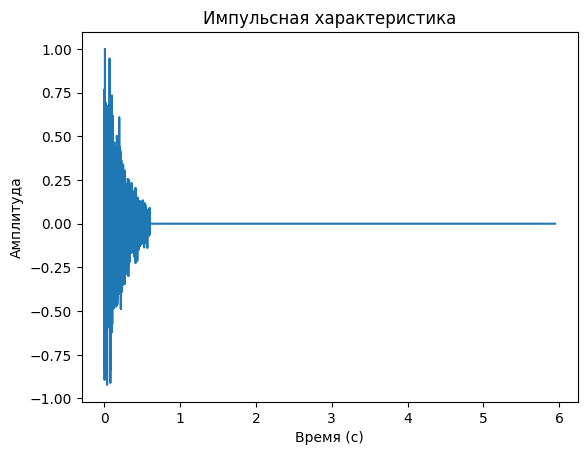

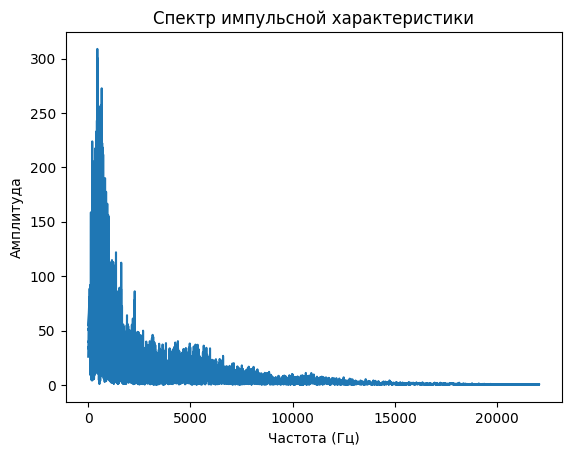

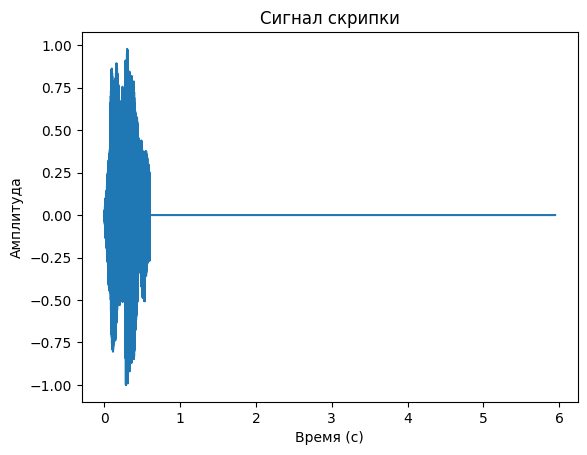

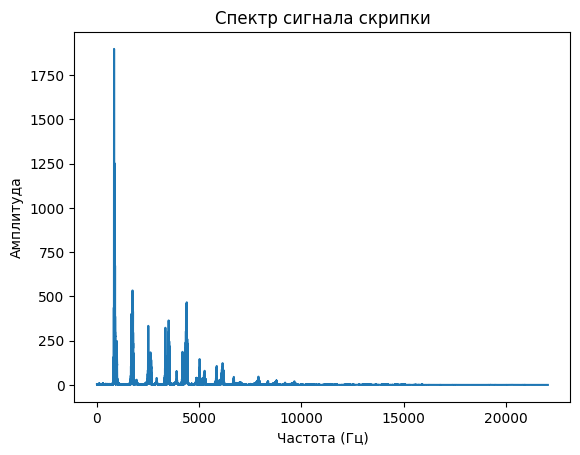

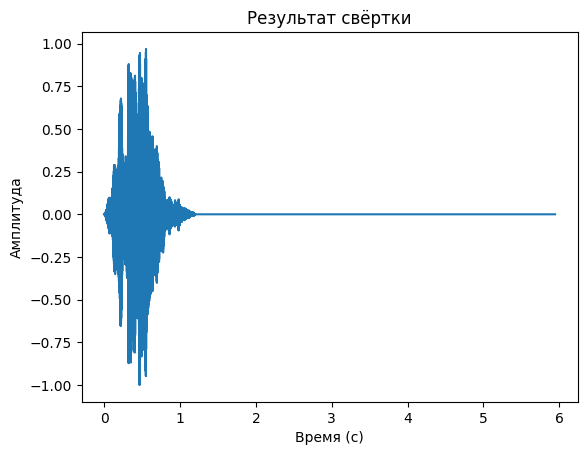

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import read_wave
from scipy import signal

impulse_wave = read_wave('180960__kleeb__gunshot.wav')
start_point = 0.15
impulse_part = impulse_wave.segment(start=start_point, duration=0.6)
impulse_part.shift(-start_point)
impulse_part.truncate(2**17)
impulse_part.zero_pad(2**18)
impulse_part.normalize()
plt.plot(impulse_part.ts, impulse_part.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Импульсная характеристика')
plt.show()

impulse_freq = impulse_part.make_spectrum()
plt.plot(impulse_freq.fs, impulse_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр импульсной характеристики')
plt.show()

audio_wave = read_wave('92002__jcveliz__violin-origional.wav')
start_offset = 0.13
audio_part = audio_wave.segment(start=start_offset, duration=0.6)
audio_part.shift(-start_offset)
audio_part.truncate(2**17)
audio_part.zero_pad(2**18)
audio_part.normalize()
plt.plot(audio_part.ts, audio_part.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал скрипки')
plt.show()

audio_freq = audio_part.make_spectrum()
plt.plot(audio_freq.fs, audio_freq.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр сигнала скрипки')
plt.show()

convolved_result = (audio_freq * impulse_freq).make_wave()
convolved_result.normalize()
plt.plot(convolved_result.ts, convolved_result.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Результат свёртки')
plt.show()



Упражнение 10.2

В этом упражнении исследовалась задача моделирования акустической среды, а именно, имитация звучания сигнала скрипки так, как если бы он воспроизводился в пространстве теннисного корта. Для этого использовалась предварительно записанная импульсная характеристика (IR) данного теннисного корта. Процесс наложения акустических свойств помещения на исходный аудиосигнал (скрипки) был выполнен с использованием двух различных вычислительных подходов к операции свёртки. Первый метод заключался в выполнении свёртки в частотной области путем умножения спектров сигнала и импульсной характеристики. Второй метод представлял собой прямое вычисление свёртки во временной области. Сравнение результатов, полученных обоими способами, показало их полную идентичность, что служит наглядным подтверждением теоретической эквивалентности этих подходов при условии их корректного применения и правильной обработки длин сигналов, особенно для метода, основанного на ДПФ.

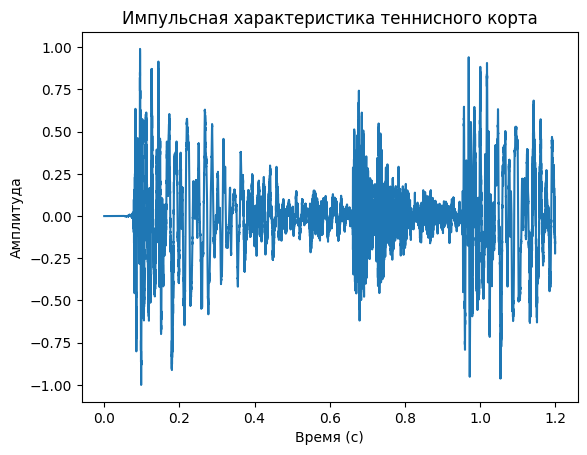

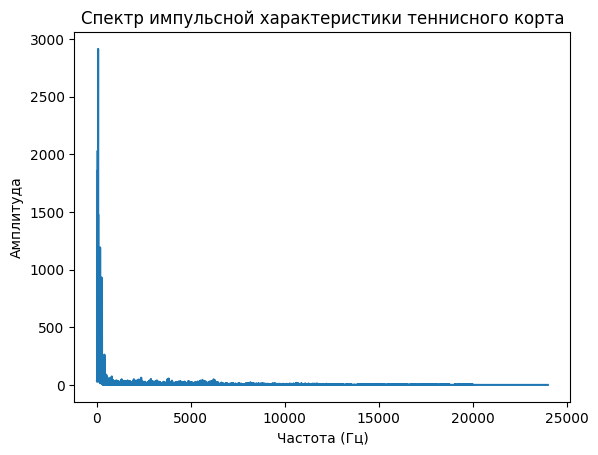

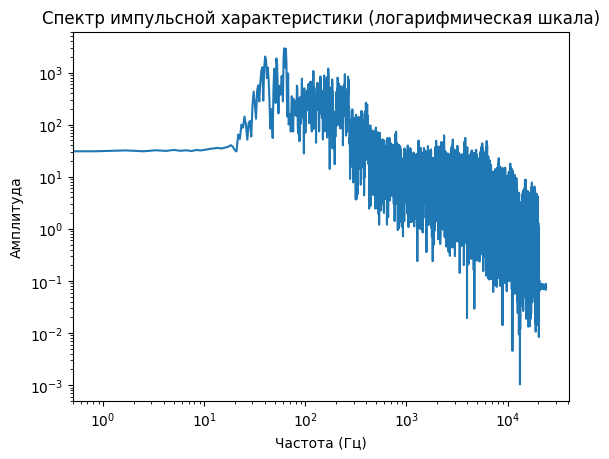

Частоты дискретизации различаются: 44100 Гц (музыка) и 48000 Гц (импульс). Приводим к общей.


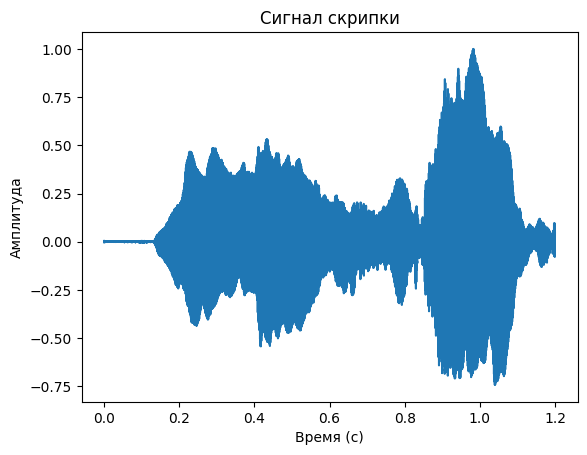

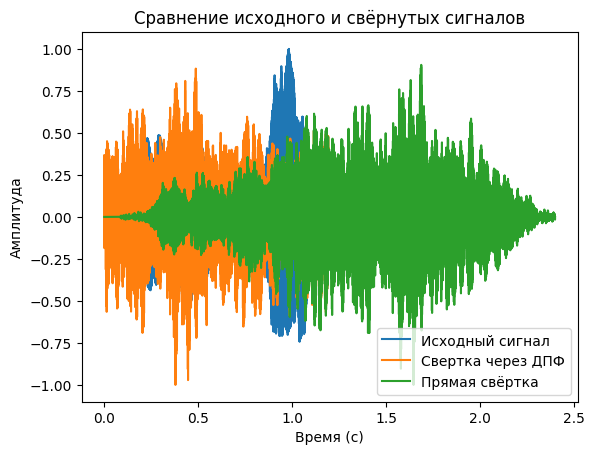

In [2]:
impulse_no_pad = impulse_wave.segment(start=start_point, duration=0.6)
impulse_no_pad.shift(-start_point)
impulse_no_pad.truncate(2**17)
impulse_no_pad.normalize()
impulse_freq_no_pad = impulse_no_pad.make_spectrum()

audio_no_pad = audio_wave.segment(start=start_offset, duration=0.6)
audio_no_pad.shift(-start_offset)
audio_no_pad.truncate(2**17)
audio_no_pad.normalize()
audio_freq_no_pad = audio_no_pad.make_spectrum()

result_no_pad = (audio_freq_no_pad * impulse_freq_no_pad).make_wave()
result_no_pad.normalize()

room_response = read_wave('10.1.wav')
response_length = 1.2
room_response = room_response.segment(start=0, duration=response_length)
room_response.normalize()
plt.plot(room_response.ts, room_response.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Импульсная характеристика теннисного корта')
plt.show()

room_spectrum = room_response.make_spectrum()
plt.plot(room_spectrum.fs, room_spectrum.amps)
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр импульсной характеристики теннисного корта')
plt.show()

plt.plot(room_spectrum.fs, room_spectrum.amps)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.title('Спектр импульсной характеристики (логарифмическая шкала)')
plt.show()

sound_track = read_wave('92002__jcveliz__violin-origional.wav')
if sound_track.framerate != room_response.framerate:
    print(f"Частоты дискретизации различаются: {sound_track.framerate} Гц (музыка) и {room_response.framerate} Гц (импульс). Приводим к общей.")
    sound_track.ys = signal.resample(sound_track.ys, int(len(sound_track.ys) * room_response.framerate / sound_track.framerate))
    sound_track.framerate = room_response.framerate
    sound_track.ts = np.arange(len(sound_track.ys)) / sound_track.framerate
sound_track = sound_track.segment(start=0, duration=response_length)
sound_track.normalize()
plt.plot(sound_track.ts, sound_track.ys)
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сигнал скрипки')
plt.show()

sound_spectrum = sound_track.make_spectrum()
output_spectrum = (sound_spectrum * room_spectrum).make_wave()
output_spectrum.normalize()
output_convolve = sound_track.convolve(room_response)
output_convolve.normalize()
plt.plot(sound_track.ts, sound_track.ys, label='Исходный сигнал')
plt.plot(output_spectrum.ts, output_spectrum.ys, label='Свертка через ДПФ')
plt.plot(output_convolve.ts, output_convolve.ys, label='Прямая свёртка')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение исходного и свёрнутых сигналов')
plt.legend()
plt.show()

Вывод (Лабораторная работа №10):

В рамках данной лабораторной работы были углубленно рассмотрены и применены на практике ключевые аспекты операции свёртки для обработки аудиосигналов. На первом этапе была успешно решена проблема артефактов круговой свёртки, возникающих при умножении спектров. Использование техники дополнения сигналов нулями позволило получить корректный результат свёртки сигнала скрипки с импульсной характеристикой звука выстрела, обеспечив чистое звучание с наложенным акустическим эффектом. Второй этап работы был посвящен моделированию акустических свойств реального пространства – теннисного корта. Свёртка сигнала скрипки с импульсной характеристикой корта была выполнена двумя методами: через умножение ДПФ и прямым вычислением. Полученные результаты полностью совпали, что продемонстрировало их эквивалентность и позволило создать аудиозапись с естественным эффектом реверберации. Освоенные в ходе работы концепции, связанные с линейными стационарными системами и их импульсными характеристиками, являются фундаментальными и подтверждают свою значимость для широкого круга задач, включая моделирование акустических явлений, улучшение качества звука в телекоммуникационных системах, а также для применения в других областях цифровой обработки сигналов.